In [4]:
#import librairies

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime

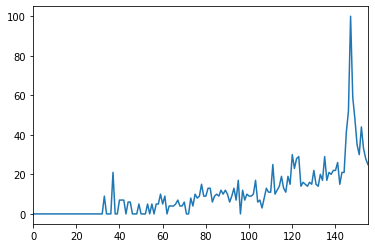

In [10]:
df_GT = pd.read_csv("/Users/guillaume/Downloads/multiTimeline.csv")
df_GT.columns
#plt.plot(df_GT['Mois'],df_GT['vanguard voo etf: (États-Unis)'])
df_GT['vanguard voo etf: (États-Unis)'].plot()

In [11]:
df_GT

,Mois,vanguard voo etf: (États-Unis)
0,2007-12,0
1,2008-01,0
2,2008-02,0
3,2008-03,0
4,2008-04,0
...,...,...
151,2020-07,30
152,2020-08,44
153,2020-09,33
154,2020-10,28


In [30]:
df_database.to_excel('Data/S&PCompanies.xlsx', engine='xlsxwriter')

In [5]:
df_changeSP = pd.read_excel("Data/SPchangeWiki.xlsx")
df_changeSP

,Date,Ticker,Security_added,Ticker.1,Security_removed,Reason
0,"October 12, 2020",NaN,NaN,NBL,Noble Energy,Chevron acquired Noble Energy.[6]
1,"October 9, 2020",VNT,Vontier,NaN,NaN,S&P 500 constituent Fortive spun off Vontier.[6]
2,"October 7, 2020",POOL,Pool Corporation,ETFC,E*TRADE Financial,Morgan Stanley acquired E*TRADE.[7]
3,"September 21, 2020",ETSY,Etsy,HRB,H&R Block,Market capitalization change.[8]
4,"September 21, 2020",TER,Teradyne,COTY,Coty Inc.,Market capitalization change.[8]
...,...,...,...,...,...,...
254,"December 5, 2000",SBL,Symbol Technologies,OI,Owens-Illinois,Market Cap changes.
255,"December 5, 2000",AYE,Allegheny Energy,GRA,W.R. Grace,Market Cap changes.
256,"December 5, 2000",ABK,Ambac Financial,CCK,Crown Holdings,Market Cap changes.
257,"July 27, 2000",JDSU,JDS Uniphase,RAD,RiteAid,Market Cap change.[206]


In [64]:
tickers = []
dates = []
for i in range(len(df_changeSP['Date'].values)):
    if pd.notna(df_changeSP['Ticker'].values[i]):
        dates.append(df_changeSP['Date'].values[i])
        tickers.append(df_changeSP['Ticker'].values[i])
        #print(df_changeSP['Date'].values[i])
        #print(df_changeSP['Ticker Symbol'].values[i])
print(len(dates))
print(tickers)

255
['VNT', 'POOL', 'ETSY', 'TER', 'CTLT', 'BIO', 'TDY', 'TYL', 'WST', 'DPZ', 'DXCM', 'OTIS', 'CARR', 'GDI', 'PAYC', 'LYV', 'ZBRA', 'STE', 'ODFL', 'WRB', 'NOW', 'LVS', 'NVR', 'CDW', 'LDOS', 'IEX', 'TMUS', 'MKTX', 'BMS', 'CTVA', 'DOW', 'WAB', 'ATO', 'TFX', 'FRC', 'CE', 'LW', 'MXIM', 'FANG', 'JKHY', 'KEYS', 'FTNT', 'ROL', 'WCG', 'ANET', 'CPRT', 'FLT', 'BR', 'HFC', 'TWTR', 'EVRG', 'ABMD', 'MSCI', 'TTWO', 'SIVB', 'NKTR', 'IPGP', 'HII', 'NCLH', 'CDNS', 'SBAC', 'Q', 'BHF', 'DRE', 'AOS', 'PKG', 'RMD', 'MGM', 'HLT', 'ALGN', 'ANSS', 'RE', 'INFO', 'IT', 'DXC', 'AMD', 'RJF', 'ARE', 'SNPS', 'DISH', 'REG', 'CBOE', 'INCY', 'IDXX', 'MAA', 'EVHC', 'ARNC', 'COTY', 'COO', 'CHTR', 'MTD', 'FTV', 'LNT', 'ALB', 'FBHS', 'UA', 'TDG', 'AJG', 'LKQ', 'DLR', 'ALK', 'AYI', 'GPN', 'ULTA', 'FL', 'HOLX', 'CNC', 'UDR', 'AWK', 'CXO', 'CFG', 'FRT', 'EXR', 'WLTW', 'CHD', 'CSRA', 'ILMN', 'SYF', 'HPE', 'VRSK', 'CMCSK', 'FOX', 'NWS', 'UAL', 'ATVI', 'SIG', 'PYPL', 'AAP', 'KHC', 'CPGX', 'JBHT', 'BXLT', 'QRVO', 'O', 'AAL', 'EQ

In [72]:
stocks = []
entree = []
sortie = []

for i in range(len(df_changeSP['Ticker'].values)):
    if pd.notna(df_changeSP['Ticker'].values[i]):
        for j in range(len(df_changeSP['Ticker.1'].values)):
            if df_changeSP['Ticker.1'].values[j] == df_changeSP['Ticker'].values[i]:
                stocks.append(df_changeSP['Ticker.1'].values[j])
                sortie.append(pd.Timestamp(datetime.strptime(df_changeSP['Date'].values[j], '%B %d, %Y').date()))
                entree.append(pd.Timestamp(datetime.strptime(df_changeSP['Date'].values[i], '%B %d, %Y').date()))

In [73]:
changeFlow = pd.DataFrame(stocks,columns=['stocks'])
changeFlow

,stocks
0,TER
1,BMS
2,MXIM
3,WCG
4,NKTR
...,...
57,SBL
58,AYE
59,ABK
60,JDSU


In [74]:
changeFlow['entree'] = entree
changeFlow['sortie'] = sortie
changeFlow.to_excel('Data/changeTick.xlsx', engine='xlsxwriter')

In [30]:
pip install pandas_datareader

     |████████████████████████████████| 112kB 244kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [188]:
from pandas_datareader import data
start_date = '2006-01-01'
end_date = '2019-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.

SP_data = data.DataReader(['SPY','VOO','IVV'], 'yahoo', start_date, end_date)['Volume']
#SP_data = SP_data.pct_change()
SP_data = SP_data.fillna(0)
SP_data

Symbols,SPY,VOO,IVV
Date,,,
2006-01-03,73256700.0,0.0,4768100.0
2006-01-04,51899600.0,0.0,1156500.0
2006-01-05,47307500.0,0.0,1278600.0
2006-01-06,62885900.0,0.0,824200.0
2006-01-09,43527400.0,0.0,1341300.0
...,...,...,...
2019-12-24,20270000.0,1305900.0,2716300.0
2019-12-26,30911200.0,2390300.0,2847400.0
2019-12-27,42528800.0,2225400.0,5091400.0


In [191]:
SP_data["Total Volume"] = SP_data["SPY"]+SP_data["VOO"]+SP_data["IVV"]

ETF_data = SP_data
del ETF_data['SPY']
del ETF_data["VOO"]
del ETF_data['IVV']
ETF_data

Symbols,Total Volume
Date,
2006-01-03,78024800.0
2006-01-04,53056100.0
2006-01-05,48586100.0
2006-01-06,63710100.0
2006-01-09,44868700.0
...,...
2019-12-24,24292200.0
2019-12-26,36148900.0
2019-12-27,49845600.0


In [110]:
SP_data["Total Volume"].to_excel('Data/TotalVolumeETF.xlsx', engine='xlsxwriter')

In [195]:
SP500_data = data.DataReader('^GSPC', 'yahoo', start_date, end_date)['Adj Close']
SP500_data = SP500_data.pct_change()
SP500_data

Date
2006-01-03         NaN
2006-01-04    0.003673
2006-01-05    0.000016
2006-01-06    0.009399
2006-01-09    0.003656
                ...   
2019-12-24   -0.000195
2019-12-26    0.005128
2019-12-27    0.000034
2019-12-30   -0.005781
2019-12-31    0.002946
Name: Adj Close, Length: 3523, dtype: float64

In [85]:
index = []
for value in SP_data.index:
    index.append(pd.Timestamp(value))

SP_data.index = index

In [86]:
#create dummy with condition for all stocks
for i in range(len(changeFlow['stocks'])):
    SP_data[changeFlow['stocks'][i]] = ((SP_data.index >= changeFlow['entree'].values[i]) & (SP_data.index < changeFlow['sortie'].values[i]))*1

In [87]:
SP_data

,High,Low,Open,Close,Volume,Adj Close,TER,BMS,MXIM,WCG,...,LO,RRC,GME,TDC,ESRX,SBL,AYE,ABK,JDSU,YHOO
2003-01-02,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
2003-01-03,0.002442,0.026426,0.033200,-0.000484,-0.080052,-0.000484,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
2003-01-06,0.022519,0.006113,-0.000484,0.022474,0.269809,0.022474,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
2003-01-07,-0.001030,0.012481,0.022474,-0.006545,0.076120,-0.006545,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
2003-01-08,-0.008466,-0.012621,-0.006545,-0.014086,-0.050220,-0.014086,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,0.009698,0.013396,0.013396,0.011648,0.121518,0.011648,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-11-17,-0.001488,-0.003189,0.002819,-0.004792,-0.091331,-0.004792,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-11-18,-0.001110,-0.005949,0.000493,-0.011564,0.098942,-0.011564,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-11-19,-0.009359,-0.006585,-0.014584,0.003946,-0.175800,0.003946,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
SP_data.to_excel('Data/test.xlsx', engine='xlsxwriter')

In [88]:
from pandas_datareader import data
test = SP_data.iloc[:,6:]
test.columns
data = data.DataReader(test.columns, 'yahoo', start_date, end_date)

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'WCG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'Q', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CMCSK', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CPGX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BXLT', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/ba

In [89]:
data

Attributes   Adj Close                                                       \
Symbols            TER BMS       MXIM       NKTR        BHF        AMD EVHC   
Date                                                                          
2003-01-02   13.208933 NaN  21.035997   8.560000        NaN   7.010000  NaN   
2003-01-03   13.331149 NaN  21.077169   9.080000        NaN   6.940000  NaN   
2003-01-06   14.402906 NaN  22.500357   8.890000        NaN   7.160000  NaN   
2003-01-07   14.534525 NaN  22.406261   8.710000        NaN   7.170000  NaN   
2003-01-08   14.017451 NaN  21.435904   8.180000        NaN   6.690000  NaN   
...                ...  ..        ...        ...        ...        ...  ...   
2020-11-16  107.180000 NaN  82.089996  16.950001  34.700001  83.730003  NaN   
2020-11-17  105.910004 NaN  80.760002  17.559999  34.490002  83.360001  NaN   
2020-11-18  104.820000 NaN  79.260002  17.110001  33.959999  82.540001  NaN   
2020-11-19  106.470001 NaN  81.180000  17.270000  34.110001  85.540001  NaN   
2020-11-20  106.330002 NaN  80.470001  16.760000  34.009998  84.639999  NaN   

Attributes                               ... Volume                           \
Symbols     COTY         AYI         FL  ...    GGP KRFT ESV JOY CVC MJN ARG   
Date                                     ...                                   
2003-01-02   NaN    9.607013   6.943866  ...    NaN  NaN NaN NaN NaN NaN NaN   
2003-01-03   NaN    9.491344   6.737428  ...    NaN  NaN NaN NaN NaN NaN NaN   
2003-01-06   NaN   10.096889   6.687378  ...    NaN  NaN NaN NaN NaN NaN NaN   
2003-01-07   NaN    9.960809   6.693635  ...    NaN  NaN NaN NaN NaN NaN NaN   
2003-01-08   NaN    9.457325   6.681125  ...    NaN  NaN NaN NaN NaN NaN NaN   
...          ...         ...        ...  ...    ...  ...  ..  ..  ..  ..  ..   
2020-11-16  5.32  107.989998  39.720001  ...    NaN  NaN NaN NaN NaN NaN NaN   
2020-11-17  5.11  107.959999  40.020000  ...    NaN  NaN NaN NaN NaN NaN NaN   
2020-11-18  5.30  109.769997  39.939999  ...    NaN  NaN NaN NaN NaN NaN NaN   
2020-11-19  6.25  112.339996  41.330002  ...    NaN  NaN NaN NaN NaN NaN NaN   
2020-11-20  6.05  109.860001  39.279999  ...    NaN  NaN NaN NaN NaN NaN NaN   

Attributes                
Symbols     LO JDSU YHOO  
Date                      
2003-01-02 NaN  NaN  NaN  
2003-01-03 NaN  NaN  NaN  
2003-01-06 NaN  NaN  NaN  
2003-01-07 NaN  NaN  NaN  
2003-01-08 NaN  NaN  NaN  
...         ..  ...  ...  
2020-11-16 NaN  NaN  NaN  
2020-11-17 NaN  NaN  NaN  
2020-11-18 NaN  NaN  NaN  
2020-11-19 NaN  NaN  NaN  
2020-11-20 NaN  NaN  NaN  

[4505 rows x 354 columns]

In [91]:
from pandas_datareader import data
data_fin = data.DataReader(tickers, 'yahoo', start_date, end_date)

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'GDI', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'KORS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'TYC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'PCLN', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'HRS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/ba

In [92]:
data_fin

Attributes  Adj Close                                                  \
Symbols           VNT        POOL        ETSY         TER        CTLT   
Date                                                                    
2003-01-02        NaN   10.362391         NaN   13.208933         NaN   
2003-01-03        NaN   10.053582         NaN   13.331149         NaN   
2003-01-06        NaN   10.201123         NaN   14.402906         NaN   
2003-01-07        NaN   10.242300         NaN   14.534525         NaN   
2003-01-08        NaN   10.070738         NaN   14.017451         NaN   
...               ...         ...         ...         ...         ...   
2020-11-16  29.110001  340.799988  125.620003  107.180000  105.360001   
2020-11-17  30.639999  329.450012  128.820007  105.910004  104.970001   
2020-11-18  31.190001  322.440002  127.010002  104.820000  103.139999   
2020-11-19  30.719999  338.649994  134.500000  106.470001  104.160004   
2020-11-20  31.180000  339.869995  140.059998  106.330002  103.330002   

Attributes                                                              ...  \
Symbols            BIO         TDY         TYL         WST         DPZ  ...   
Date                                                                    ...   
2003-01-02   38.209999   15.780000    4.060000    4.879498         NaN  ...   
2003-01-03   37.990002   15.550000    4.000000    4.780523         NaN  ...   
2003-01-06   38.549999   16.200001    3.900000    4.738955         NaN  ...   
2003-01-07   38.820000   15.700000    3.630000    4.828033         NaN  ...   
2003-01-08   38.400002   15.420000    3.680000    4.713222         NaN  ...   
...                ...         ...         ...         ...         ...  ...   
2020-11-16  597.210022  390.880005  414.119995  292.010010  384.820007  ...   
2020-11-17  592.570007  394.170013  413.670013  286.790009  384.470001  ...   
2020-11-18  578.979980  391.869995  408.940002  281.290009  382.459991  ...   
2020-11-19  574.380005  390.820007  414.380005  281.220001  385.040009  ...   
2020-11-20  569.979980  382.019989  414.470001  284.730011  389.559998  ...   

Attributes Volume                                        
Symbols      PCLN ARG HRS  LO JEC TSO LUK KFT JDSU YHOO  
Date                                                     
2003-01-02    NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  
2003-01-03    NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  
2003-01-06    NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  
2003-01-07    NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  
2003-01-08    NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  
...           ...  ..  ..  ..  ..  ..  ..  ..  ...  ...  
2020-11-16    NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  
2020-11-17    NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  
2020-11-18    NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  
2020-11-19    NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  
2020-11-20    NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  

[4505 rows x 1524 columns]

In [93]:
data_fin.to_excel('Data/data_stock_price.xlsx', engine='xlsxwriter')

In [207]:
#download all data for stock 
df_1 = pd.read_excel("Data/data_stock_1.xlsx")
df_1 = df_1.dropna()

df_2 = pd.read_excel("Data/data_stock_2.xlsx")
df_2 = df_2.dropna()

df_3 = pd.read_excel("Data/data_stock_3.xlsx")
df_3 = df_3.dropna()

df_4 = pd.read_excel("Data/data_stock_4.xlsx")
df_4 = df_4.dropna()

df_5 = pd.read_excel("Data/data_stock_5.xlsx")
df_5 = df_5.dropna()

df_6 = pd.read_excel("Data/data_stock_6.xlsx")
df_6 = df_6.dropna()

df_7 = pd.read_excel("Data/data_stock_7.xlsx")
df_7 = df_7.dropna()


In [206]:
#aggregate all data
data = df_1
data = data.append(df_2)
data = data.append(df_3)
data = data.append(df_4)
data = data.append(df_5)
data = data.append(df_6)
data = data.append(df_7)
data

,Instrument,Date,Price Close,P/E (Daily Time Series Ratio),Return On Equity - Mean,Volume,Company Market Cap,Ask Price,Bid Price
0,AAL.OQ,NaN,NaN,NaN,NaN,0.0,3.605077e+09,NaN,NaN
1,AAL.OQ,NaN,NaN,NaN,NaN,0.0,3.687611e+09,NaN,NaN
2,AAL.OQ,NaN,NaN,NaN,NaN,0.0,3.715672e+09,NaN,NaN
3,AAL.OQ,NaN,NaN,NaN,NaN,0.0,3.740433e+09,NaN,NaN
4,AAL.OQ,NaN,NaN,NaN,NaN,0.0,3.761891e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...
116685,ZTS.N,NaN,NaN,NaN,NaN,NaN,NaN,132.95,132.93
116686,ZTS.N,NaN,NaN,NaN,NaN,NaN,NaN,133.04,133.03
116687,ZTS.N,NaN,NaN,NaN,NaN,NaN,NaN,133.26,133.25
116688,ZTS.N,NaN,NaN,NaN,NaN,NaN,NaN,132.24,132.21


In [146]:
data = data.rename(columns={'P/E (Daily Time Series Ratio)': 'P/E','Return On Equity - Mean':'ROE'})
data["Spread Bid-Ask"] = data["Ask Price"] - data["Bid Price"]
data

,Instrument,Date,Price Close,P/E,ROE,Volume,Company Market Cap,Ask Price,Bid Price,Spread Bid-Ask
2297,AAL.OQ,2015-02-25T00:00:00Z,49.73,12.641817,150.82080,1988576.0,3.464440e+10,42.00,41.99,0.01
2298,AAL.OQ,2015-02-26T00:00:00Z,49.35,12.545217,150.82080,1300627.0,3.437967e+10,42.71,42.70,0.01
2299,AAL.OQ,2015-02-27T00:00:00Z,47.90,12.176614,150.82080,1699608.0,3.336953e+10,42.25,42.24,0.01
2300,AAL.OQ,2015-03-02T00:00:00Z,48.31,12.280840,150.82080,2928631.0,3.365515e+10,43.14,43.13,0.01
2301,AAL.OQ,2015-03-03T00:00:00Z,48.77,12.397776,150.10540,1926757.0,3.397561e+10,43.20,43.19,0.01
...,...,...,...,...,...,...,...,...,...,...
116614,ZTS.N,2019-12-24T00:00:00Z,132.92,43.533939,71.61114,167970.0,6.330970e+10,120.98,120.94,0.04
116615,ZTS.N,2019-12-26T00:00:00Z,133.03,43.569966,71.61114,388934.0,6.336209e+10,119.61,119.57,0.04
116616,ZTS.N,2019-12-27T00:00:00Z,133.25,43.642021,71.61114,463295.0,6.346688e+10,122.43,122.42,0.01
116617,ZTS.N,2019-12-30T00:00:00Z,132.21,43.301400,71.61114,320304.0,6.297152e+10,123.30,123.26,0.04


In [125]:
data

In [114]:
data.to_excel('Data/agregatedData.xlsx', engine='xlsxwriter')

In [140]:
#doanload etf data

etf_data = pd.read_excel("Data/etf_data.xlsx",sheet_name="etf_data")
etf_data

,Date,Total NAV
0,2006-01-02T00:00:00Z,249.572765
1,2006-01-03T00:00:00Z,253.701363
2,2006-01-04T00:00:00Z,254.681101
3,2006-01-05T00:00:00Z,254.684100
4,2006-01-06T00:00:00Z,257.137807
...,...,...
3647,2019-12-25T00:00:00Z,643.813760
3648,2019-12-26T00:00:00Z,647.170659
3649,2019-12-27T00:00:00Z,647.203358
3650,2019-12-30T00:00:00Z,643.537480


In [159]:
finish_data = pd.merge(data,etf_data, how='left', on='Date')

finish_data.index = finish_data['Date']
finish_data = finish_data.drop(finish_data.columns[1],axis=1)
finish_data["growth Total NAV"] = finish_data['Total NAV'].pct_change()
#finish_data = finish_data.dropna()
finish_data

,Instrument,Price Close,P/E,ROE,Volume,Company Market Cap,Ask Price,Bid Price,Spread Bid-Ask,Total NAV,growth Total NAV
Date,,,,,,,,,,,
2015-02-26T00:00:00Z,AAL.OQ,49.35,12.545217,150.82080,1300627.0,3.437967e+10,42.71,42.70,0.01,424.245395,-0.001310
2015-02-27T00:00:00Z,AAL.OQ,47.90,12.176614,150.82080,1699608.0,3.336953e+10,42.25,42.24,0.01,422.993305,-0.002951
2015-03-02T00:00:00Z,AAL.OQ,48.31,12.280840,150.82080,2928631.0,3.365515e+10,43.14,43.13,0.01,425.601481,0.006166
2015-03-03T00:00:00Z,AAL.OQ,48.77,12.397776,150.10540,1926757.0,3.397561e+10,43.20,43.19,0.01,423.683776,-0.004506
2015-03-04T00:00:00Z,AAL.OQ,48.95,12.443534,150.10540,1551096.0,3.410101e+10,43.84,43.83,0.01,421.912969,-0.004180
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24T00:00:00Z,ZTS.N,132.92,43.533939,71.61114,167970.0,6.330970e+10,120.98,120.94,0.04,643.813760,-0.000126
2019-12-26T00:00:00Z,ZTS.N,133.03,43.569966,71.61114,388934.0,6.336209e+10,119.61,119.57,0.04,647.170659,0.005214
2019-12-27T00:00:00Z,ZTS.N,133.25,43.642021,71.61114,463295.0,6.346688e+10,122.43,122.42,0.01,647.203358,0.000051


In [180]:
import re
test_date = "2019-12-31T00:00:00Z"
#date_test = pd.Timestamp(test_date)
x = re.search(r"^(.*?)T", test_date)
print(x.group(1))

2019-12-31


In [182]:
dates = []
for value in finish_data.index.values:
    x = re.search(r"^(.*?)T", str(value))
    new_date = pd.Timestamp(x.group(1))
    dates.append(new_date)

In [184]:
finish_data.index = dates
finish_data

,Instrument,Price Close,P/E,ROE,Volume,Company Market Cap,Ask Price,Bid Price,Spread Bid-Ask,Total NAV,growth Total NAV
2015-02-26,AAL.OQ,49.35,12.545217,150.82080,1300627.0,3.437967e+10,42.71,42.70,0.01,424.245395,-0.001310
2015-02-27,AAL.OQ,47.90,12.176614,150.82080,1699608.0,3.336953e+10,42.25,42.24,0.01,422.993305,-0.002951
2015-03-02,AAL.OQ,48.31,12.280840,150.82080,2928631.0,3.365515e+10,43.14,43.13,0.01,425.601481,0.006166
2015-03-03,AAL.OQ,48.77,12.397776,150.10540,1926757.0,3.397561e+10,43.20,43.19,0.01,423.683776,-0.004506
2015-03-04,AAL.OQ,48.95,12.443534,150.10540,1551096.0,3.410101e+10,43.84,43.83,0.01,421.912969,-0.004180
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,ZTS.N,132.92,43.533939,71.61114,167970.0,6.330970e+10,120.98,120.94,0.04,643.813760,-0.000126
2019-12-26,ZTS.N,133.03,43.569966,71.61114,388934.0,6.336209e+10,119.61,119.57,0.04,647.170659,0.005214
2019-12-27,ZTS.N,133.25,43.642021,71.61114,463295.0,6.346688e+10,122.43,122.42,0.01,647.203358,0.000051
2019-12-30,ZTS.N,132.21,43.301400,71.61114,320304.0,6.297152e+10,123.30,123.26,0.04,643.537480,-0.005664


In [186]:
del finish_data['Ask Price']
finish_data

,Instrument,Price Close,P/E,ROE,Volume,Company Market Cap,Bid Price,Spread Bid-Ask,Total NAV,growth Total NAV
2015-02-26,AAL.OQ,49.35,12.545217,150.82080,1300627.0,3.437967e+10,42.70,0.01,424.245395,-0.001310
2015-02-27,AAL.OQ,47.90,12.176614,150.82080,1699608.0,3.336953e+10,42.24,0.01,422.993305,-0.002951
2015-03-02,AAL.OQ,48.31,12.280840,150.82080,2928631.0,3.365515e+10,43.13,0.01,425.601481,0.006166
2015-03-03,AAL.OQ,48.77,12.397776,150.10540,1926757.0,3.397561e+10,43.19,0.01,423.683776,-0.004506
2015-03-04,AAL.OQ,48.95,12.443534,150.10540,1551096.0,3.410101e+10,43.83,0.01,421.912969,-0.004180
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,ZTS.N,132.92,43.533939,71.61114,167970.0,6.330970e+10,120.94,0.04,643.813760,-0.000126
2019-12-26,ZTS.N,133.03,43.569966,71.61114,388934.0,6.336209e+10,119.57,0.04,647.170659,0.005214
2019-12-27,ZTS.N,133.25,43.642021,71.61114,463295.0,6.346688e+10,122.42,0.01,647.203358,0.000051
2019-12-30,ZTS.N,132.21,43.301400,71.61114,320304.0,6.297152e+10,123.26,0.04,643.537480,-0.005664


In [187]:
del finish_data["Bid Price"]
del finish_data["Total NAV"]
finish_data

,Instrument,Price Close,P/E,ROE,Volume,Company Market Cap,Spread Bid-Ask,growth Total NAV
2015-02-26,AAL.OQ,49.35,12.545217,150.82080,1300627.0,3.437967e+10,0.01,-0.001310
2015-02-27,AAL.OQ,47.90,12.176614,150.82080,1699608.0,3.336953e+10,0.01,-0.002951
2015-03-02,AAL.OQ,48.31,12.280840,150.82080,2928631.0,3.365515e+10,0.01,0.006166
2015-03-03,AAL.OQ,48.77,12.397776,150.10540,1926757.0,3.397561e+10,0.01,-0.004506
2015-03-04,AAL.OQ,48.95,12.443534,150.10540,1551096.0,3.410101e+10,0.01,-0.004180
...,...,...,...,...,...,...,...,...
2019-12-24,ZTS.N,132.92,43.533939,71.61114,167970.0,6.330970e+10,0.04,-0.000126
2019-12-26,ZTS.N,133.03,43.569966,71.61114,388934.0,6.336209e+10,0.04,0.005214
2019-12-27,ZTS.N,133.25,43.642021,71.61114,463295.0,6.346688e+10,0.01,0.000051
2019-12-30,ZTS.N,132.21,43.301400,71.61114,320304.0,6.297152e+10,0.04,-0.005664


In [192]:
agr_data = finish_data.join(ETF_data)
agr_data

,Instrument,Price Close,P/E,ROE,Volume,Company Market Cap,Spread Bid-Ask,growth Total NAV,Total Volume
2006-01-04,AAP.N,43.83,21.265241,28.88000,628400.0,4.741410e+09,0.05,-0.605437,53056100.0
2006-01-04,ACN.N,29.46,18.872276,65.95920,1670200.0,2.487852e+10,0.02,-0.605437,53056100.0
2006-01-04,ADS.N,37.85,104.995978,18.00000,775900.0,3.105064e+09,0.06,-0.605437,53056100.0
2006-01-04,AIZ.N,44.67,14.467922,13.76000,443000.0,5.847170e+09,0.06,-0.605437,53056100.0
2006-01-04,AJG.N,31.76,43.645558,8.60000,307500.0,3.040162e+09,0.03,-0.605437,53056100.0
...,...,...,...,...,...,...,...,...,...
2019-12-31,XEC.N,52.49,8.970656,11.59300,277387.0,5.344014e+09,0.01,0.003014,62718900.0
2019-12-31,XRAY.OQ,56.59,79.268805,9.69488,624540.0,1.258639e+10,0.01,0.003014,62718900.0
2019-12-31,XYL.N,78.79,27.665028,17.73733,247042.0,1.418841e+10,0.02,0.003014,62718900.0
2019-12-31,ZBRA.OQ,255.44,28.293506,40.16333,168968.0,1.379451e+10,0.07,0.003014,62718900.0


In [202]:
agr_data_final = agr_data.join(SP500_data)
agr_data_final['Date'] = agr_data_final.index
agr_data_final = agr_data_final.sort_values(by=['Instrument','Date'])
agr_data_final

,Instrument,Price Close,P/E,ROE,Volume,Company Market Cap,Spread Bid-Ask,growth Total NAV,Total Volume,Adj Close,Date
2015-02-26,AAL.OQ,49.35,12.545217,150.82080,1300627.0,3.437967e+10,0.01,-0.001310,78142400.0,-0.001476,2015-02-26
2015-02-27,AAL.OQ,47.90,12.176614,150.82080,1699608.0,3.336953e+10,0.01,-0.002951,112975100.0,-0.002956,2015-02-27
2015-03-02,AAL.OQ,48.31,12.280840,150.82080,2928631.0,3.365515e+10,0.01,0.006166,96821900.0,0.006125,2015-03-02
2015-03-03,AAL.OQ,48.77,12.397776,150.10540,1926757.0,3.397561e+10,0.01,-0.004506,114851200.0,-0.004539,2015-03-03
2015-03-04,AAL.OQ,48.95,12.443534,150.10540,1551096.0,3.410101e+10,0.01,-0.004180,120790500.0,-0.004389,2015-03-04
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,ZTS.N,132.92,43.533939,71.61114,167970.0,6.330970e+10,0.04,-0.000126,24292200.0,-0.000195,2019-12-24
2019-12-26,ZTS.N,133.03,43.569966,71.61114,388934.0,6.336209e+10,0.04,0.005214,36148900.0,0.005128,2019-12-26
2019-12-27,ZTS.N,133.25,43.642021,71.61114,463295.0,6.346688e+10,0.01,0.000051,49845600.0,0.000034,2019-12-27
2019-12-30,ZTS.N,132.21,43.301400,71.61114,320304.0,6.297152e+10,0.04,-0.005664,55585900.0,-0.005781,2019-12-30


In [208]:
#agr_data_final['Date'] = agr_data_final.index
agr_data_final = agr_data_final.rename(columns={'Total Volume': 'Total Volume ETF','Adj Close':'Return S&P500'})
agr_data_final

,Instrument,Price Close,P/E,ROE,Volume,Company Market Cap,Spread Bid-Ask,growth Total NAV,Total Volume ETF,Return S&P500,Date
2015-02-26,AAL.OQ,49.35,12.545217,150.82080,1300627.0,3.437967e+10,0.01,-0.001310,78142400.0,-0.001476,2015-02-26
2015-02-27,AAL.OQ,47.90,12.176614,150.82080,1699608.0,3.336953e+10,0.01,-0.002951,112975100.0,-0.002956,2015-02-27
2015-03-02,AAL.OQ,48.31,12.280840,150.82080,2928631.0,3.365515e+10,0.01,0.006166,96821900.0,0.006125,2015-03-02
2015-03-03,AAL.OQ,48.77,12.397776,150.10540,1926757.0,3.397561e+10,0.01,-0.004506,114851200.0,-0.004539,2015-03-03
2015-03-04,AAL.OQ,48.95,12.443534,150.10540,1551096.0,3.410101e+10,0.01,-0.004180,120790500.0,-0.004389,2015-03-04
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,ZTS.N,132.92,43.533939,71.61114,167970.0,6.330970e+10,0.04,-0.000126,24292200.0,-0.000195,2019-12-24
2019-12-26,ZTS.N,133.03,43.569966,71.61114,388934.0,6.336209e+10,0.04,0.005214,36148900.0,0.005128,2019-12-26
2019-12-27,ZTS.N,133.25,43.642021,71.61114,463295.0,6.346688e+10,0.01,0.000051,49845600.0,0.000034,2019-12-27
2019-12-30,ZTS.N,132.21,43.301400,71.61114,320304.0,6.297152e+10,0.04,-0.005664,55585900.0,-0.005781,2019-12-30


In [203]:
agr_data_final.to_excel('Data/agregatedData_final.xlsx', engine='xlsxwriter')

In [209]:
agr_data_final.to_csv('Data/agregatedData_final.csv')